In [2]:
from math import *
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

5. Markowitz Portfolio Selection

(i) Importing the prices and defining useful variables

In [107]:
# Importing the adjusted prices
prices = pd.read_csv(r'AdjustedPrices.csv')
prices = prices.set_index('Date', drop = True)

In [54]:
# Computing the returns
Ret = (prices - prices.shift(1)) / prices.shift(1)
Ret = Ret.drop(labels=Ret.index[0], axis=0)
RET = Ret.values

In [55]:
# Average return
p = Ret.mean()
P = p.values

In [56]:
# Sample covariance matrix
Sigma = (pd.DataFrame(Ret.sub(p).sum(0)).dot(pd.DataFrame(Ret.sub(p).sum(0)).T)) * (1/(len(Ret.index) - 1))
SIGMA = Sigma.values

(iii) Portfolio Selection

In [108]:
B   = 1
one = np.array([1 for i in range(len(Ret.columns))])

R_range = np.logspace(-6, 0, num=100)

Result = []
X      = []
for R in R_range:
    # Construct the problem.
    x_ = cp.Variable(len(Ret.columns))
    objective = cp.Maximize(np.transpose(P) @ x_)
    constraints = [(x_ @ SIGMA @ x_) <= R, (np.transpose(one) @ x_) <= B, x_ >= 0]
    prob = cp.Problem(objective, constraints)
    # Solve
    result    = prob.solve()
    Result += [result]
    X      += [x_.value]

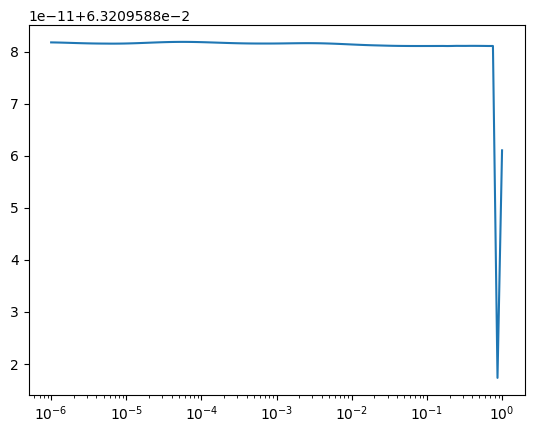

In [109]:
plt.xscale("log")
plt.plot(R_range, Result)

(iv) Specific portfolio

In [104]:
R_ = 10**(-1)

In [105]:
ind = 0
for i in range(len(R_range)):
    if R_range[i] == R:
        ind = i
X[ind]

array([4.41226094e-12, 1.07421714e-11, 1.60231886e-11, 1.91072845e-11,
       1.00000000e+00, 1.60330421e-11, 1.50780742e-11, 1.36238826e-11,
       1.27920964e-11, 1.57166437e-11, 1.64394667e-11, 1.61106878e-11,
       1.47494564e-11, 1.49064396e-11, 1.48030419e-11, 1.35650474e-11,
       1.45569785e-11, 1.36657052e-11, 1.30856315e-11, 2.40954107e-12,
       8.46622783e-12, 1.60847660e-11, 1.53537414e-11, 1.59838577e-11,
       1.59980880e-11, 1.12325573e-11, 1.16921130e-11, 1.55583376e-11,
       1.62947572e-11, 1.51078254e-11])

We observe that the portfolio tend to have a position of zero for every stocks except the 5th one corresponding to "TSLA" (Tesla)